In [1]:
# import mat73
import scipy
import numpy as np
import h5py
# %pip install mat73

In [2]:
image_mat_file_path = "/home/zwhy/RoboOTC/RoboOTC_data/human_kidney_example_volume_fov.mat"
volume_mat_file_path = "/home/zwhy/RoboOTC/RoboOTC_data/human_kidney_example_volume.mat"

In [3]:
image_mat = scipy.io.loadmat(image_mat_file_path)

volume_mat = h5py.File(volume_mat_file_path, 'r')
# mat

In [4]:
print(image_mat.keys())
print(volume_mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'VideoImage', 'X_range', 'Y_range', 'Z_range'])
<KeysViewHDF5 ['Intensity']>


(484, 648, 3)


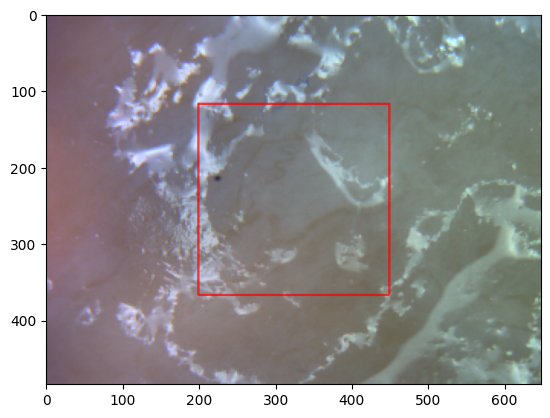

In [5]:
print(image_mat['VideoImage'].shape)
rgb = image_mat['VideoImage']

#coverting to uint8
rgb = rgb.astype(np.uint8)

import matplotlib.pyplot as plt
plt.imshow(rgb)

In [ ]:
print(volume_mat['Intensity'].shape)

#the first dimension is the number of slices
volume = volume_mat['Intensity']

volume = np.array(volume)
# switch the second and third dimensions
volume = np.swapaxes(volume, 1, 2)
# print(volume.shape)
#grab the first slice

print(volume.shape)


(1326, 1299, 574)


In [80]:
sample_slice = volume[500, :, :]

[[ 90.10552557  88.25825629  81.9159165  ...  92.29970012  91.35343707
   67.09479606]
 [ 85.45156165  86.01931948  64.30663451 ...  88.62497877  85.67555511
   77.70674655]
 [110.12829892 101.38193388 115.62010388 ... 101.81643746 106.01529102
  110.99861625]
 ...
 [206.23605272 200.17892804 198.64466481 ... 199.03487467 195.64076118
  190.28771139]
 [199.02941713 201.50216056 198.17739862 ... 196.94951256 200.46397829
  197.90627422]
 [191.1370662  193.38481837 199.31260192 ... 195.6135776  197.42009318
  197.74761508]]
[[ 90.10552557  88.25825629  81.9159165  ...  92.29970012  91.35343707
   67.09479606]
 [ 85.45156165  86.01931948  64.30663451 ...  88.62497877  85.67555511
   77.70674655]
 [110.12829892 101.38193388 115.62010388 ... 101.81643746 106.01529102
  110.99861625]
 ...
 [206.23605272 200.17892804 198.64466481 ... 199.03487467 195.64076118
  190.28771139]
 [199.02941713 201.50216056 198.17739862 ... 196.94951256 200.46397829
  197.90627422]
 [191.1370662  193.38481837 199.

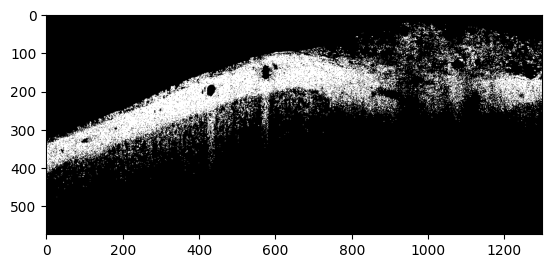

In [84]:
print(sample_slice)

d_min = 100
d_max = 220

#convert to uint8
# sample_slice = sample_slice.astype(np.uint8)
#we first linespace the values between 0 and 255
sample_slice = np.interp(sample_slice, (sample_slice.min(), sample_slice.max()), (0, 255))
print(sample_slice)
binary_slice = np.zeros_like(sample_slice)
binary_slice[sample_slice < d_min] = 255
binary_slice[sample_slice >= d_min] = 0
binary_slice[sample_slice > d_max] = 255

#count number of 1 in the binary slice
print(binary_slice)
count = np.count_nonzero(binary_slice == 0)
print(count)

plt.imshow(binary_slice, cmap='gray')

In [85]:
#extract the coordinates of the 255
y_coords, x_coords = np.where(binary_slice == 255)

points = np.zeros((len(x_coords), 3))

for i in range(len(x_coords)):
    # print(f"x: {x_coords[i]}, y: {y_coords[i]}, z: {500*0.03}")
    points[i, 0] = x_coords[i]
    points[i, 1] = y_coords[i]
    points[i, 2] = 500 * 0.03
# print(points)

import open3d as o3d
# Create a point cloud object
pcd = o3d.geometry.PointCloud()
# Convert the numpy array to a point cloud
pcd.points = o3d.utility.Vector3dVector(points)

o3d.visualization.draw_geometries([pcd])


In [96]:
points_slice = []
for i in range(len(volume[0])):
    slice = volume[i, :, :]
    slice = np.interp(slice, (slice.min(), slice.max()), (0, 255))
    binary_slice = np.zeros_like(sample_slice)
    binary_slice[sample_slice < d_min] = 255
    binary_slice[sample_slice >= d_min] = 0
    binary_slice[sample_slice > d_max] = 255

    y_coords, x_coords = np.where(binary_slice == 255)
    points = np.zeros((len(x_coords), 3))
    for j in range(len(x_coords)):
        # print(f"x: {x_coords[i]}, y: {y_coords[i]}, z: {500*0.03}")
        points[j, 0] = x_coords[j]
        points[j, 1] = y_coords[j]
        points[j, 2] = (i+1) * 0.3
    
    points_slice.append(points)



In [97]:
print(points_slice)
total_pcd = o3d.geometry.PointCloud()
for i in range(len(points_slice)):
    points_slice[i] = np.array(points_slice[i])
    print(points_slice[i].shape)
    # Create a point cloud object
    pcd = o3d.geometry.PointCloud()
    # Convert the numpy array to a point cloud
    pcd.points = o3d.utility.Vector3dVector(points_slice[i])
    # Visualize the point cloud
    total_pcd += pcd

o3d.visualization.draw_geometries([total_pcd])
# Create a point cloud object
# pcd = o3d.geometry.PointCloud() 
# # Convert the numpy array to a point cloud
# pcd.points = o3d.utility.Vector3dVector(points_slice)


[array([[0.00e+00, 0.00e+00, 3.00e-01],
       [1.00e+00, 0.00e+00, 3.00e-01],
       [2.00e+00, 0.00e+00, 3.00e-01],
       ...,
       [4.90e+01, 4.55e+02, 3.00e-01],
       [4.80e+01, 4.56e+02, 3.00e-01],
       [2.80e+01, 4.77e+02, 3.00e-01]], shape=(101033, 3)), array([[  0. ,   0. ,   0.6],
       [  1. ,   0. ,   0.6],
       [  2. ,   0. ,   0.6],
       ...,
       [ 49. , 455. ,   0.6],
       [ 48. , 456. ,   0.6],
       [ 28. , 477. ,   0.6]], shape=(101033, 3)), array([[  0. ,   0. ,   0.9],
       [  1. ,   0. ,   0.9],
       [  2. ,   0. ,   0.9],
       ...,
       [ 49. , 455. ,   0.9],
       [ 48. , 456. ,   0.9],
       [ 28. , 477. ,   0.9]], shape=(101033, 3)), array([[  0. ,   0. ,   1.2],
       [  1. ,   0. ,   1.2],
       [  2. ,   0. ,   1.2],
       ...,
       [ 49. , 455. ,   1.2],
       [ 48. , 456. ,   1.2],
       [ 28. , 477. ,   1.2]], shape=(101033, 3)), array([[  0. ,   0. ,   1.5],
       [  1. ,   0. ,   1.5],
       [  2. ,   0. ,   1.5],
   

In [88]:
o3d.visualization.draw_geometries([pcd])